Event Classifcation for Smart Adaptive Triggering Mechanism

In [1]:
# Import Depenencies
import tensorflow as tf # for deep learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard # for visualization
import numpy as np  # for numerical operations
import scipy.io as sio  # for loading .mat files
import matplotlib.pyplot as plt  # for plotting
from scipy import signal  # for signal processing
from scipy.signal import hilbert  # for signal processing

# # for visualization
# log_dir = 'logs/fit/'
# tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)



In [2]:
# Global Variables
NumEvent = 4  # number of event classes


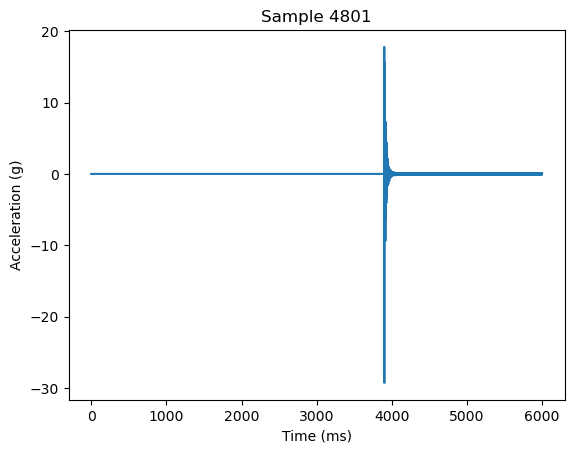

the size of the data is:
(9600, 6000)
the size of the label is:
(9600, 1)
note: each row is a sample, and each column is a feature


In [3]:
# Data Preparation

# (1) Raw Data
DataPath = '/Volumes/SSD Part A/02 PhD Research/Research/02 Smart Adaptive Mechanism for Triggering/Data - Generated by Python/Data_by_Event_PT.mat'
RawData = sio.loadmat(DataPath)  # load .mat file
# transpose and rename the data
RawData = np.transpose(RawData['Data_by_Event_PT'])

selected_sample = 4800  # select a sample for plotting
plt_sample = RawData[selected_sample, :]  # selected sample for plotting
plt.plot(plt_sample)  # plot the selected sample
plt.title('Sample ' + str(selected_sample+1))  # add title to the plot
plt.xlabel('Time (ms)')  # add x-axis label
plt.ylabel('Acceleration (g)')  # add y-axis label
plt.show()  # show the plot

# RawData = RawData[0:100,:] # select the first 10000 samples -- FOR QUICK TESTING

print("the size of the data is:")
print(RawData.shape)  # print the shape of the data

# (2) Labels
NumSample = RawData.shape[0]  # number of samples
LenTS = RawData.shape[1]  # length of time series

LabelEvent = []  # initialize the label list
NumStart = 0  # start index of ambient vibration
NumEnd = round(NumSample/NumEvent)  # end index of ambient vibration

for i in range(NumStart, NumEnd):  # loop over labels for ambient vibration
    label = 0  # "av"
    LabelEvent.append(label)
for i in range(NumStart, NumEnd):  # loop over labels for earthquake
    label = 1  # "eq"
    LabelEvent.append(label)
for i in range(NumStart, NumEnd):  # loop over labels for impact
    label = 2  # "ip"
    LabelEvent.append(label)
for i in range(NumStart, NumEnd):  # loop over labels for wind
    label = 3  # "wd"
    LabelEvent.append(label)

LabelEvent = np.array(LabelEvent)  # convert the label list to a numpy array
LabelEvent = np.reshape(LabelEvent, (-1, 1))  # reshape the label array
print("the size of the label is:")
print(LabelEvent.shape)  # print the shape of the label array

print("note: each row is a sample, and each column is a feature")


In [4]:
# Data Preprocessing

# (1) Feature Engineering - frequency domain
PSD = []  # initialize the temporary data list
for i in range(NumSample):
    # tune the parameters to get the best result
    freq, psd = signal.welch(RawData[i, :], fs=1000, nperseg=96)
    # convert the power spectrum density to dB
    psd = 10 * np.log10(psd)
    # normalize the power spectrum density
    psd = (psd - np.mean(psd)) / np.std(psd)
    psd = np.reshape(psd, (1, -1))  # reshape the power spectrum density
    if len(PSD) == 0:
        PSD = psd  # initialize the PSD matrix
    else:
        # append the power spectrum density to the PSD matrix horizontally
        PSD = np.concatenate((PSD, psd), axis=0)

    if i % 2000 == 0:
        print("the number of samples processed is: %d / %d" %
              (i, NumSample))  # print the number of samples processed
print("the shape of the PSD matrix is:")
print(PSD.shape)  # print the shape of the PSD matrix

# (2) Feature Engineering - time domain
DS_Data = []  # initialize the temporary data list
ds_factor = 1/128  # downsample factor
for i in range(NumSample):
    tmp_data = RawData[i, :]
    tmp_data = hilbert(tmp_data)  # Hilbert transform
    tmp_data = np.abs(tmp_data)  # get the absolute value
    tmp_data = signal.resample(tmp_data, round(
        LenTS*ds_factor))  # downsample the raw data
    tmp_data = (tmp_data - np.mean(tmp_data)) / \
        np.std(tmp_data)  # normalize the downsampled data
    tmp_data = np.reshape(tmp_data, (1, -1))  # reshape the downsampled data
    if len(DS_Data) == 0:
        DS_Data = tmp_data  # initialize the temporary data list
    else:
        # append the downsampled data to the temporary data list
        DS_Data = np.append(DS_Data, tmp_data, axis=0)

    if i % 2000 == 0:
        print("the number of samples processed is: %d / %d" %
              (i, NumSample))  # print the number of samples processed

print("the shape of downsampled data is:")
print(DS_Data.shape)  # print the shape of the downsampled data

# concatenate the PSD matrix to the data matrix
# concatenate the PSD matrix to the data matrix -- [DS_Data,PSD]
DataEvent = np.concatenate((DS_Data, PSD), axis=1)

print("the shape of the data matrix is:")
print(DataEvent.shape)  # print the shape of the data matrix

print(np.max(DataEvent))
print(np.min(DataEvent))


the number of samples processed is: 0 / 9600
the number of samples processed is: 2000 / 9600
the number of samples processed is: 4000 / 9600
the number of samples processed is: 6000 / 9600
the number of samples processed is: 8000 / 9600
the shape of the PSD matrix is:
(9600, 49)
the number of samples processed is: 0 / 9600
the number of samples processed is: 2000 / 9600
the number of samples processed is: 4000 / 9600
the number of samples processed is: 6000 / 9600
the number of samples processed is: 8000 / 9600
the shape of downsampled data is:
(9600, 47)
the shape of the data matrix is:
(9600, 96)
6.764262013004999
-6.917500195977127


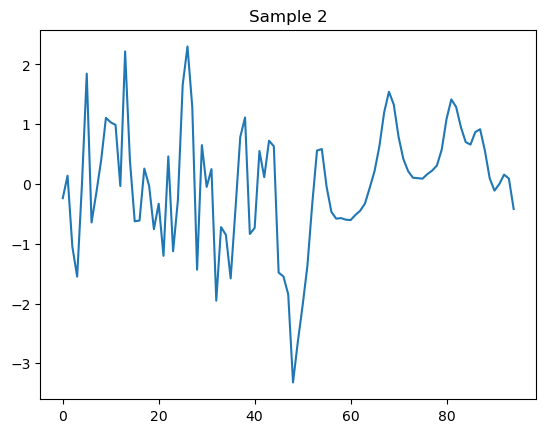

In [5]:

selected_sample = 1  # select a sample for plotting
plt_sample = DataEvent[selected_sample, :]  # selected sample for plotting
plt.plot(plt_sample[1:])  # plot the selected sample
plt.title('Sample ' + str(selected_sample+1))  # add title to the plot
plt.show()  # show the plot



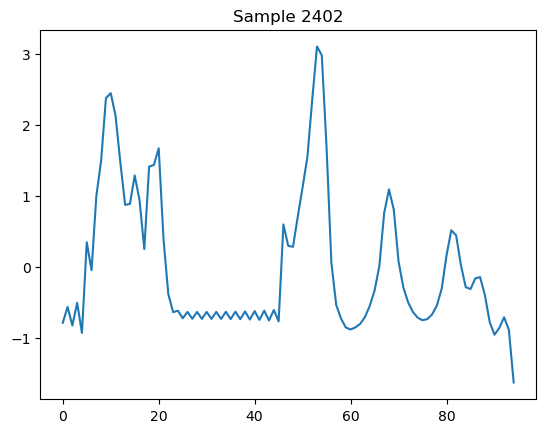

In [6]:
selected_sample = 2401  # select a sample for plotting
plt_sample = DataEvent[selected_sample, :]  # selected sample for plotting
plt.plot(plt_sample[1:])  # plot the selected sample
plt.title('Sample ' + str(selected_sample+1))  # add title to the plot
plt.show()  # show the plot


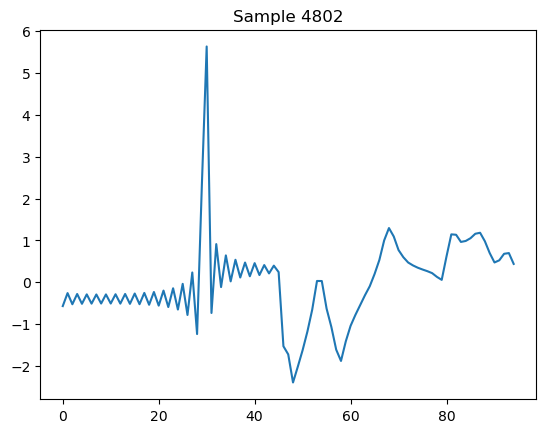

In [7]:
selected_sample = 4801  # select a sample for plotting
plt_sample = DataEvent[selected_sample, :]  # selected sample for plotting
plt.plot(plt_sample[1:])  # plot the selected sample
plt.title('Sample ' + str(selected_sample+1))  # add title to the plot
plt.show()  # show the plot


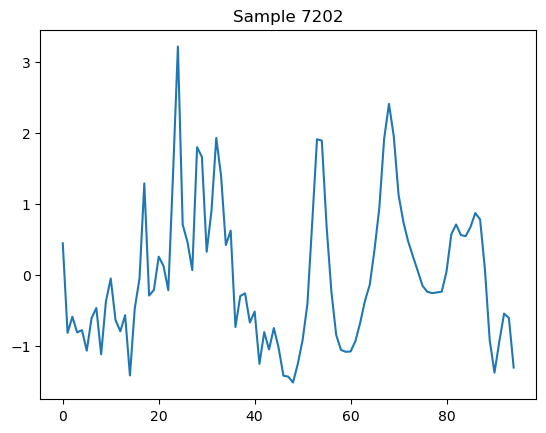

In [8]:
selected_sample = 7201  # select a sample for plotting
plt_sample = DataEvent[selected_sample, :]  # selected sample for plotting
plt.plot(plt_sample[1:])  # plot the selected sample
plt.title('Sample ' + str(selected_sample+1))  # add title to the plot
plt.show()  # show the plot


In [9]:
print("the shape of the processed data matrix is:")
print(DataEvent.shape)  # print the shape of the processed data matrix

# (3) Data Shuffling
indices = np.arange(NumSample)  # create an array of indices
np.random.shuffle(indices)  # shuffle the indices

DataEvent = DataEvent[indices, :]  # shuffle the data
LabelEvent = LabelEvent[indices, :]  # shuffle the labels

print("data shuffled")

# (4) Data Splitting
train_ratio = 0.6
validation_ratio = 0.2
test_ratio = 0.2

mark_train = int(train_ratio*NumSample)  # mark the end of training set
# mark the end of validation set
mark_validation = int((train_ratio+validation_ratio)*NumSample)
mark_test = int((train_ratio+validation_ratio+test_ratio)
                * NumSample)  # mark the end of test set

DataEvent_train, DataEvent_validation, DataEvent_test = np.split(
    DataEvent, [mark_train, mark_validation])  # split the data
LabelEvent_train, LabelEvent_validation, LabelEvent_test = np.split(
    LabelEvent, [mark_train, mark_validation])  # split the labels

print("data sizes (training/validation/test):")
tmp_str = str(DataEvent_train.shape[0]) + "/ " + str(
    DataEvent_validation.shape[0]) + "/ " + str(DataEvent_test.shape[0])
print(tmp_str)

print("label sizes (training/validation/test):")
tmp_str = str(LabelEvent_train.shape[0]) + "/ " + str(
    LabelEvent_validation.shape[0]) + "/ " + str(LabelEvent_test.shape[0])
print(tmp_str)

# (5) one-hot encoding for labels (training/validation/test)
num_classes = len(np.unique(LabelEvent))
LabelEvent_train = tf.keras.utils.to_categorical(LabelEvent_train, num_classes)
LabelEvent_validation = tf.keras.utils.to_categorical(
    LabelEvent_validation, num_classes)
LabelEvent_test = tf.keras.utils.to_categorical(LabelEvent_test, num_classes)


the shape of the processed data matrix is:
(9600, 96)
data shuffled
data sizes (training/validation/test):
5760/ 1920/ 1920
label sizes (training/validation/test):
5760/ 1920/ 1920


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D

input_length = DataEvent.shape[1]  # length of time series
input_channels = 1  # number of channels (variables) captured at each timestep

# # Define the TensorFlow model architecture
# model = Sequential()
# model.add(Conv1D(64, 3, activation='relu',
#           input_shape=(input_length, input_channels)))
# model.add(MaxPooling1D(2))
# model.add(Conv1D(128, 3, activation='relu'))
# model.add(MaxPooling1D(2))
# model.add(Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(Dense(num_classes, activation='softmax'))

# Define the TensorFlow model architecture
model = Sequential()
model.add(Conv1D(4, 3, activation='relu',
          input_shape=(input_length, input_channels)))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 94, 4)             16        
                                                                 
 max_pooling1d (MaxPooling1  (None, 47, 4)             0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 188)               0         
                                                                 
 dense (Dense)               (None, 4)                 756       
                                                                 
Total params: 772 (3.02 KB)
Trainable params: 772 (3.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
# Train the model
model.fit(DataEvent_train, LabelEvent_train, epochs=5, batch_size=32,
          validation_data=(DataEvent_validation, LabelEvent_validation))#, callbacks=[tensorboard_callback])

Epoch 1/5
180/180 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.8080 - val_loss: 0.2822 - val_accuracy: 0.9208
Epoch 2/5
180/180 [==============================] - 0s 951us/step - loss: 0.1924 - accuracy: 0.9516 - val_loss: 0.1623 - val_accuracy: 0.9568
Epoch 3/5
180/180 [==============================] - 0s 1ms/step - loss: 0.1167 - accuracy: 0.9726 - val_loss: 0.1182 - val_accuracy: 0.9708
Epoch 4/5
180/180 [==============================] - 0s 1ms/step - loss: 0.0830 - accuracy: 0.9823 - val_loss: 0.0989 - val_accuracy: 0.9786
Epoch 5/5
180/180 [==============================] - 0s 822us/step - loss: 0.0658 - accuracy: 0.9863 - val_loss: 0.0878 - val_accuracy: 0.9802


In [12]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(DataEvent_test, LabelEvent_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')


60/60 [==============================] - 0s 513us/step - loss: 0.0819 - accuracy: 0.9818
Test Loss: 0.0819
Test Accuracy: 0.9818
